In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import re
import string

from sklearn.cluster import KMeans


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [124]:
df = pd.read_csv('census_clean.csv')
df_x = df.drop(columns=['ZA_TARGET'])

> Build PCA

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_PCA = pca.fit_transform(df_x.drop(columns=['ZZ_SPLIT']))

In [126]:
df_PCA = pd.DataFrame(df_PCA, columns=['PC1','PC2'])
df_PCA

,PC1,PC2
0,-73.241173,38.348610
1,-72.925397,11.461817
2,-73.200980,9.285858
3,-73.198970,4.716454
4,-73.199753,5.246753
...,...,...
218160,-72.858963,-8.425842
218161,-72.711348,-28.418375
218162,-72.880321,9.229601
218163,-72.854367,-8.540709


In [127]:
df_PCA['PC1'] = df_PCA['PC1'].astype('float32')
df_PCA['PC2'] = df_PCA['PC2'].astype('float32')

> Dendogram

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df_PCA)

In [129]:
from clustergram import Clustergram

cgram = Clustergram(range(1, 8))
cgram.fit(data)


K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.40557861328125 seconds.
K=3 fitted in 0.5164964199066162 seconds.
K=4 fitted in 0.5960049629211426 seconds.
K=5 fitted in 0.702974796295166 seconds.
K=6 fitted in 0.9049274921417236 seconds.
K=7 fitted in 1.038621187210083 seconds.


(-10.0, 10.0)

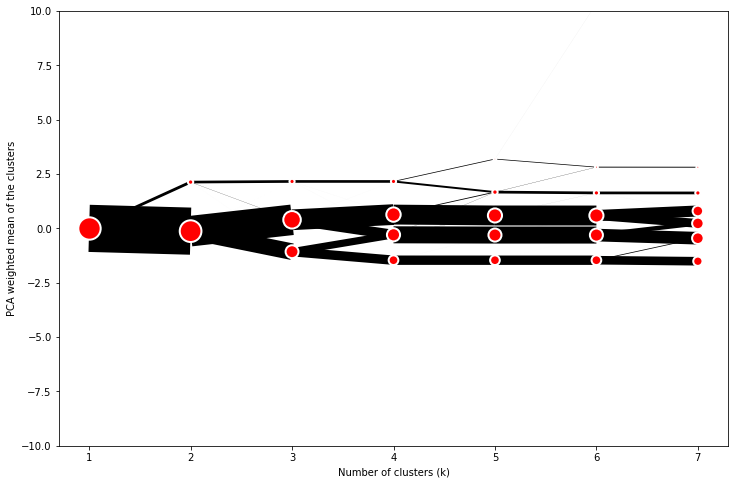

In [130]:
ax = cgram.plot(figsize=(12, 8), pca_weighted=True)
ax.set_ylim(-10,10)

> Elbow

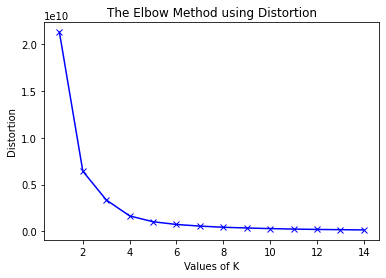

In [131]:
from sklearn.cluster import KMeans
# Elbow curve to find optimal K
distortions = []
K = range(1, 15)
for k in K:
    clustering = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clustering.fit(df_PCA)
    distortions.append(clustering.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show();

> K-Means - 4 clusters

In [132]:
# Building the model with 4 clusters
kmean = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmean.fit_predict(df_PCA)
df_PCA.insert(0, "Cluster", clusters, True)

In [133]:
df_PCA['split'] = df['ZZ_SPLIT']

> Cluster groups

In [134]:
train = df_PCA[df_PCA['split'] == 'train']


test = df_PCA[df_PCA['split'] == 'test']


In [135]:
train = train.drop(columns='split')
test = test.drop(columns='split')

In [136]:
train

,Cluster,PC1,PC2
0,0,-73.241173,38.348610
1,0,-72.925400,11.461817
2,0,-73.200981,9.285858
3,0,-73.198967,4.716454
4,0,-73.199753,5.246753
...,...,...,...
143901,0,-73.194221,1.533064
143902,0,-72.669876,-22.639353
143903,0,-73.256012,45.954041
143904,0,-72.937599,7.156726


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'Training set Clusters')

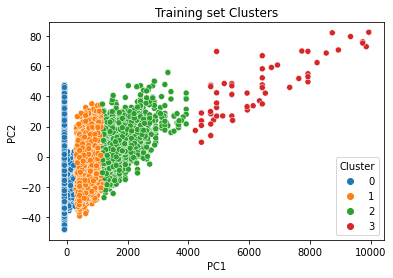

In [137]:
sns.scatterplot(x=train['PC1'], y=train['PC2'], hue=train['Cluster'], palette="tab10")
plt.title('Training set Clusters')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'Test set Clusters')

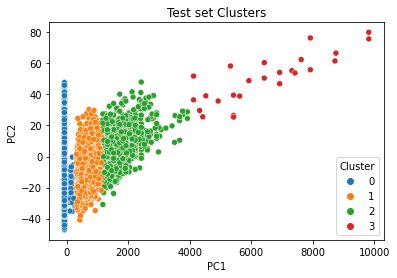

In [138]:
sns.scatterplot(x=test['PC1'], y=test['PC2'], hue=test['Cluster'], palette="tab10")
plt.title('Test set Clusters')

> 2 clusters

In [ ]:
train_full = df[df['ZZ_SPLIT'] == 'train'].reset_index()
X_train = train_full.drop(columns=['ZA_TARGET','ZZ_SPLIT'])
y_train = train_full['ZA_TARGET']


test_full = df[df['ZZ_SPLIT'] == 'test'].reset_index()
X_test = test_full.drop(columns=['ZA_TARGET','ZZ_SPLIT'])
y_test = test_full['ZA_TARGET']

train = train.drop(columns=['Cluster'])
test = test.drop(columns=['Cluster'])

In [ ]:
# Predicting training set
kmean = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_train_pred = 1-kmean.fit_predict(train)

In [ ]:
# Predicting test set
kmean = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_test_pred = 1-kmean.fit_predict(test)

In [ ]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
print('Train acc: ',train_acc)
print('Test acc: ',train_acc)

Train acc:  0.8684002056898253
Test acc:  0.8684002056898253
